In [1]:
!pip install transformers torch datasets matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#Load Data and Preprocess
from datasets import load_dataset

# Load the IMDB dataset
dataset = load_dataset("imdb")
train_data = dataset["train"].shuffle(seed=42).select(range(1000))  # Use 1k samples for speed
test_data = dataset["test"].shuffle(seed=42).select(range(200))

print("Sample review:", train_data[0]["text"])
print("Label (0=negative, 1=positive):", train_data[0]["label"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.81k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Sample review: There is no relation at all between Fortier and Profiler but the fact that both are police series about violent crimes. Profiler looks crispy, Fortier looks classic. Profiler plots are quite simple. Fortier's plot are far more complicated... Fortier looks more like Prime Suspect, if we have to spot similarities... The main character is weak and weirdo, but have "clairvoyance". People like to compare, to judge, to evaluate. How about just enjoying? Funny thing too, people writing Fortier looks American but, on the other hand, arguing they prefer American series (!!!). Maybe it's the language, or the spirit, but I think this series is more English than American. By the way, the actors are really good and funny. The acting is not superficial at all...
Label (0=negative, 1=positive): 1


In [3]:
#Load a Pre-Trained Model
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load tokenizer and model
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [4]:
#Tokenize the Data
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True, max_length=512)

# Tokenize datasets
train_data = train_data.map(tokenize, batched=True, batch_size=16)
test_data = test_data.map(tokenize, batched=True, batch_size=16)

# Format for PyTorch
train_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [10]:
!pip install --upgrade transformers

In [12]:
#Train the Model (Fine-Tuning)
from transformers import Trainer, TrainingArguments, DataCollatorWithPadding

# Created a data collator that will dynamically pad the batched samples
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Training setup
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,  # Keep it short for demo purposes
    per_device_train_batch_size=8,
    # evaluation_strategy="epoch",  # Corrected parameter name
    logging_dir="./logs",
    # Added this to disable wandb
    report_to=["none"]  # Disable wandb and other integrations
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    data_collator=data_collator,  # Added the data collator
)

# Train!
trainer.train()

Step,Training Loss


TrainOutput(global_step=375, training_loss=0.17535137939453124, metrics={'train_runtime': 146.0531, 'train_samples_per_second': 20.54, 'train_steps_per_second': 2.568, 'total_flos': 397402195968000.0, 'train_loss': 0.17535137939453124, 'epoch': 3.0})

In [17]:
#Evaluate the Model
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

# Create a function to analyze new customer reviews
def analyze_sentiment(review_text):
    inputs = tokenizer(review_text, return_tensors="pt", padding=True, truncation=True, max_length=512).to(model.device)
    with torch.no_grad():
        outputs = model(**inputs)

    # Get prediction (0 = negative, 1 = positive)
    prediction = torch.nn.functional.softmax(outputs.logits, dim=-1)
    label = torch.argmax(prediction, dim=1).item()
    score = prediction[0][label].item()

    sentiment = "positive" if label == 1 else "negative"
    return {
        "sentiment": sentiment,
        "confidence": score,
        "review": review_text
    }

# Example usage with Jumpstart fashion retail reviews
sample_reviews = [
    "I absolutely love this dress! The fabric is high quality and the fit is perfect.",
    "The shirt I ordered was too small and the color was different from what was shown online.",
    "Shipping was fast but the product quality was disappointing.",
    "These jeans are the best I've ever owned. Will definitely buy more!",
    "Customer service was unhelpful when I tried to return my order."
]

for review in sample_reviews:
    result = analyze_sentiment(review)
    print(f"Review: {result['review'][:50]}...")
    print(f"Sentiment: {result['sentiment']} (Confidence: {result['confidence']:.2f})")
    print("-" * 50)

Evaluation results: {'eval_loss': 0.5822889804840088, 'eval_runtime': 2.6426, 'eval_samples_per_second': 75.683, 'eval_steps_per_second': 9.46, 'epoch': 3.0}
Review: I absolutely love this dress! The fabric is high q...
Sentiment: positive (Confidence: 1.00)
--------------------------------------------------
Review: The shirt I ordered was too small and the color wa...
Sentiment: positive (Confidence: 0.98)
--------------------------------------------------
Review: Shipping was fast but the product quality was disa...
Sentiment: negative (Confidence: 1.00)
--------------------------------------------------
Review: These jeans are the best I've ever owned. Will def...
Sentiment: positive (Confidence: 1.00)
--------------------------------------------------
Review: Customer service was unhelpful when I tried to ret...
Sentiment: negative (Confidence: 1.00)
--------------------------------------------------


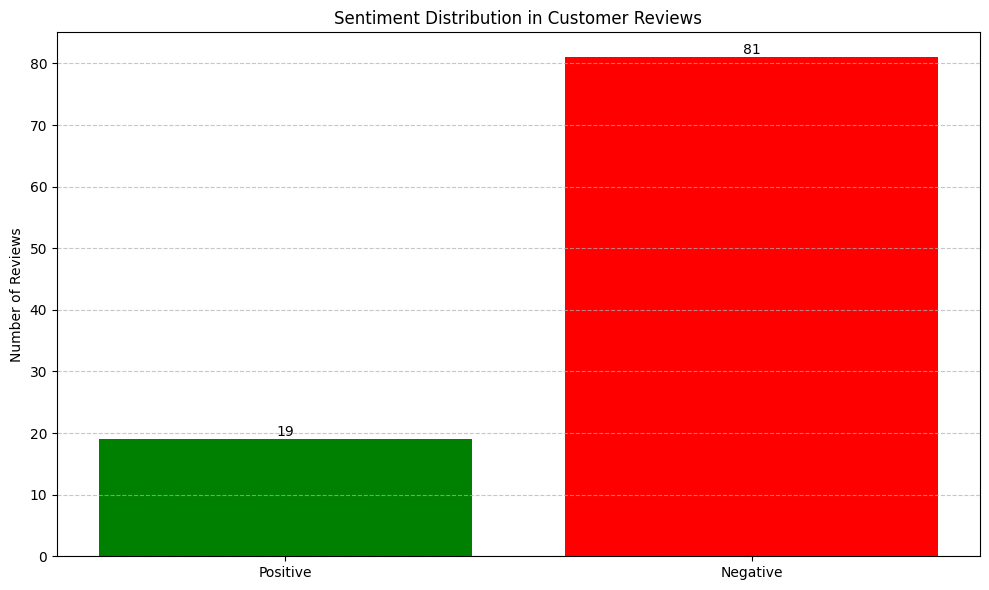

In [18]:
# Visualize sentiment distribution
import matplotlib.pyplot as plt
import numpy as np

# Function to analyze a batch of reviews
def analyze_batch(reviews):
    results = [analyze_sentiment(review) for review in reviews]
    return results

# Example: Analyze test data
test_reviews = [example["text"] for example in dataset["test"].select(range(100))]
sentiment_results = analyze_batch(test_reviews)

# Count positive and negative reviews
positive_count = sum(1 for r in sentiment_results if r["sentiment"] == "positive")
negative_count = sum(1 for r in sentiment_results if r["sentiment"] == "negative")

# Create visualization
labels = ['Positive', 'Negative']
counts = [positive_count, negative_count]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['green', 'red'])
plt.title('Sentiment Distribution in Customer Reviews')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()

In [19]:
# Save the fine-tuned model and tokenizer
model_save_path = "./jumpstart_sentiment_model"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Model and tokenizer saved to {model_save_path}")

Model and tokenizer saved to ./jumpstart_sentiment_model


In [20]:
from google.colab import drive
drive.mount('/content/drive')

# Create a directory in your Google Drive
import os
drive_path = "/content/drive/My Drive/jumpstart_sentiment_model"
os.makedirs(drive_path, exist_ok=True)

# Copy the model to Google Drive
!cp -r ./jumpstart_sentiment_model/* "/content/drive/My Drive/jumpstart_sentiment_model/"

print(f"Model saved to Google Drive at: {drive_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to Google Drive at: /content/drive/My Drive/jumpstart_sentiment_model
